# Analysis of GoFast Scooter Rental Service

### Project Plan: Analysis of GoFast Scooter Rental Service Data**

**Objective:**  
The objective of this project is to analyze data from the GoFast scooter rental service. We have received sample data on users and their rides across several cities in Russia. This project will involve data preparation and hypothesis testing to derive meaningful insights.

**Scope of Work:**

1. **Data Loading:**  
   - Import the datasets into the analysis environment.

2. **Data Preparation:**  
   - Perform data cleaning to handle missing values and remove duplicates.
   - Convert data types as necessary for analysis.

3. **Data Analysis:**  
   - Conduct exploratory data analysis to understand the distributions and relationships within the data.

4. **Data Merging:**  
   - Merge datasets to facilitate comprehensive analysis.

5. **Revenue Calculation:**  
   - Calculate revenue metrics based on ride and subscription data.

6. **Hypothesis Testing:**  
   - Formulate and test hypotheses to validate assumptions and derive insights.

7. **Distribution Analysis:**  
   - Analyze the distribution of key metrics such as ride duration, distance, and user demographics.

**Datasets:**

1. **users_go.csv:**  
   - Contains user data including demographics and registration details.

2. **rides_go.csv:**  
   - Includes detailed information about individual rides.

3. **subscriptions_go.csv:**  
   - Provides data on subscription types, including free and ultra subscriptions.

By following this structured approach, we aim to provide a thorough analysis of the GoFast scooter rental service data, leading to actionable insights and recommendations.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import binom, norm
from math import factorial, sqrt


#### Load data

##### Analysis of Rides dataset


In [5]:
rides = pd.read_csv('rides_go.csv') 
display(rides.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


We can observe, that dataset has 18.068 entries with no missing values. 
There are 4 columns, which have correct naming convention 
Data type is correct, except for the column date. This needs to be converted to correct format datetime in Section 2. 

#####  Analysis of Users dataset

In [8]:
users = pd.read_csv('users_go.csv') 
display(users.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


We can observe that the users table has 1565 entries with no missing values.
There are 5 columns, which have correct naming conventions.
The data type is correct: int for numerical values, and object for strings.

#####  Analysis of Subscription dataset

In [10]:
subscr = pd.read_csv('subscriptions_go.csv') 
display(subscr.head())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


We can observe that the subscriptions_go table has 2 entries for 2 subscription types. There are 4 columns, which have correct naming conventions. The data type is correct: int for numerical values, and object for strings.

####  Data Preparation


#####  Data type conversion 

We convert date column in the dataset rides_go to the date-time format '%Y-%m-%d'of pandas

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

##### Creation of the new column 


Add a new column with month number based on date in rides 

In [13]:
#add column month
rides['month'] = pd.DatetimeIndex(rides['date']).month
#check of there is only one year 
rides['year'] = pd.DatetimeIndex(rides['date']).year
years = rides['year'].nunique()
display(rides['year'].value_counts())
#check if the column has been added 
display(rides['month'].value_counts())


year
2021    18068
Name: count, dtype: int64

month
1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: count, dtype: int64

##### Сheck missing values & dupliactes

In [14]:
print(rides.isnull().sum()) 
print(users.isnull().sum())

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


There are no missing values in the new table

In [15]:
# delete the duplicate rows for users 
users = users.drop_duplicates()
#print(users['user_id'].count())

#check if the dupliactes are still there for users 
duplicates_user = users[users.duplicated()]
print(duplicates_user)

Empty DataFrame
Columns: [user_id, name, age, city, subscription_type]
Index: []


Сheck not obvious duplicate values in column name of users 


In [16]:
print(users['name'].unique())

['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Диана' 'Дарина' 'Данил' 'Артемий' 'Лиана' 'Альберт' 'Герман' 'Жанна'
 'Нелли' 'Евгения' 'Ариана' 'Самира' 'Захар' 'Эльвира' 'Екатерина' 'Инна'
 '

Unify duplicate names 

In [17]:
users['name'] = users['name'].replace('Наташа', 'Наталья')

Сheck duplicate values in column city of users after change


check duplicate values in column city of users 



In [18]:
display(users['city'].unique())

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In City column no duplicates have been identified


Conculsion of the data preparation part: 
- here we converted date column to correct data type 
- created new column for further analysis 
- checked and deleted duplicate values 
- replaced dupliacte values 
- checked the missing values in the datasets 

Now the data is ready for further step - data analysis

#### EDA Data Analysis

##### City frequency 

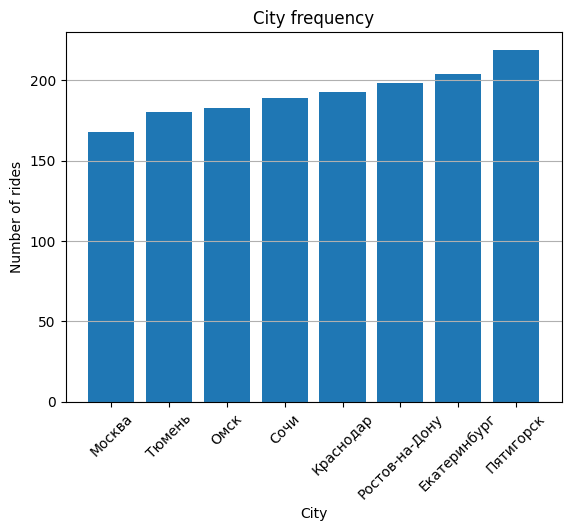

In [19]:
city_df = users['city'].value_counts().sort_values(ascending=True)
plt.bar(city_df.index, city_df.values)

plt.xlabel('City')
plt.ylabel('Number of rides')
plt.title('City frequency')
plt.grid(axis='y') 
plt.xticks(rotation=45)
plt.show()

##### Number of users with and w/o subscription

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64


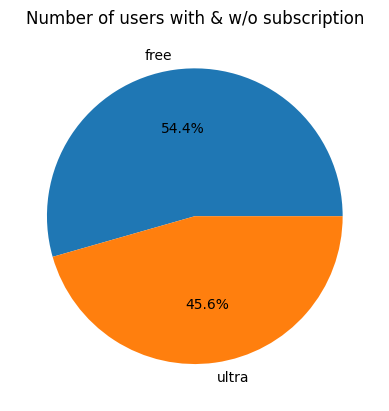

In [20]:
users_grouped = users.groupby('subscription_type')['user_id'].count()
print(users_grouped)

plt.pie(users_grouped, labels=users_grouped.index, autopct='%1.1f%%')

plt.title('Number of users with & w/o subscription')

plt.show()

The graph shows that there are slightly more unsubscribed users than subscribed users 

##### Age of useres

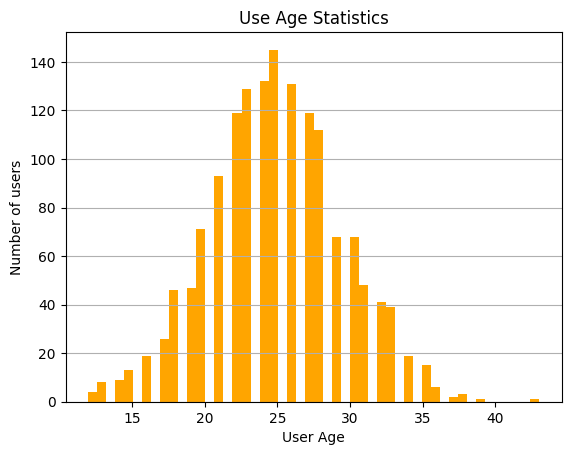

In [21]:
users['age'].describe()

plt.hist(users['age'], bins=50, color = 'orange')

plt.xlabel('User Age')
plt.ylabel('Number of users')
plt.title('Use Age Statistics')
plt.grid(axis='y')
plt.show()


Most scooter users are around 25 years old.

##### Single ride distance 

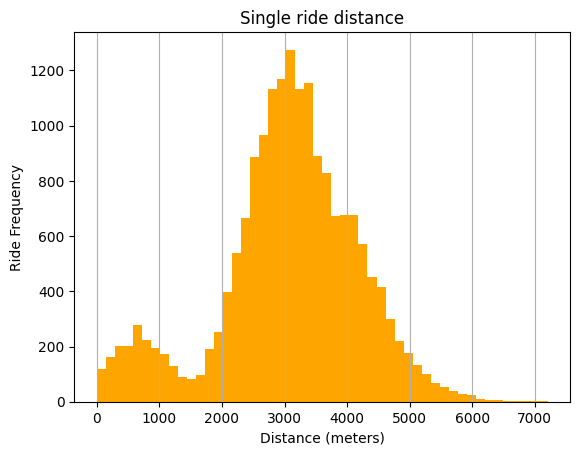

In [22]:
plt.hist(rides['distance'], bins=50, color = 'orange')

plt.xlabel('Distance (meters)')
plt.ylabel('Ride Frequency')
plt.title('Single ride distance')
plt.grid(axis='x')
plt.show()


The average user travels between 3 and 3.5 km
The two peaks around 700 meters and 3,100 meters can be explained by the fact that part of the users use the 
scooters for shorter distances and some for longer distances.
It is also possible that those who have a subscription will use the scooter longer, as the per minute charge is lower. 

##### Ride Duration

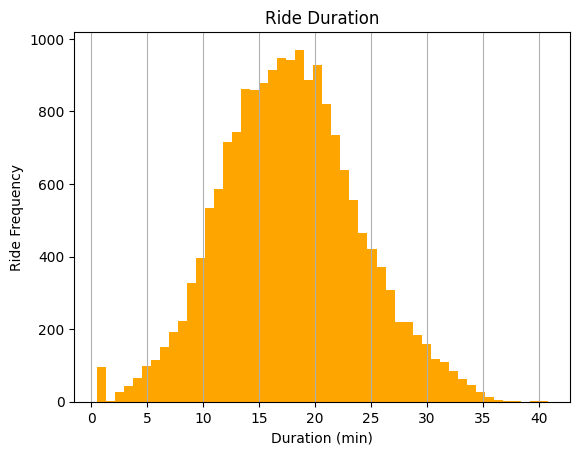

In [23]:
plt.hist(rides['duration'], bins=50, color = 'orange')

plt.xlabel('Duration (min)')
plt.ylabel('Ride Frequency')
plt.title('Ride Duration')
plt.grid(axis='x')
plt.show()

In [24]:
zero_time = rides[rides['duration'] < 1]
display(zero_time.sort_values(by = 'duration',ascending = True))

,user_id,distance,duration,date,month,year
6531,701,4196.445201,0.5,2021-08-31,8,2021
14615,1287,5944.789947,0.5,2021-12-09,12,2021
14574,1285,6316.574814,0.5,2021-09-25,9,2021
14417,1273,4178.876258,0.5,2021-04-30,4,2021
14342,1268,4177.139336,0.5,2021-06-09,6,2021
...,...,...,...,...,...,...
9581,928,4857.412920,0.5,2021-06-06,6,2021
9497,922,4620.899239,0.5,2021-01-05,1,2021
9282,907,4520.123807,0.5,2021-04-24,4,2021
10426,987,5375.139265,0.5,2021-03-16,3,2021


The graph shows a peak near zero values. If you look at the lines with duration less than 1 minute, you can see 95 lines with a value of 0.5 minutes, and the distances traveled by the user were quite large - 4-5 km. Apparently, there was an error during data uploading or application operation. 


We can replace 0.5 with the average travel time for a distance of 4000-6000 meters. 

In [25]:
distance_filter = rides.query('4000 <= distance <= 6000')
duration_mean = distance_filter['duration'].mean()
rides.loc[rides.query('duration == 0.5').index, 'duration'] = duration_mean

Updated chart without peaks 0.5

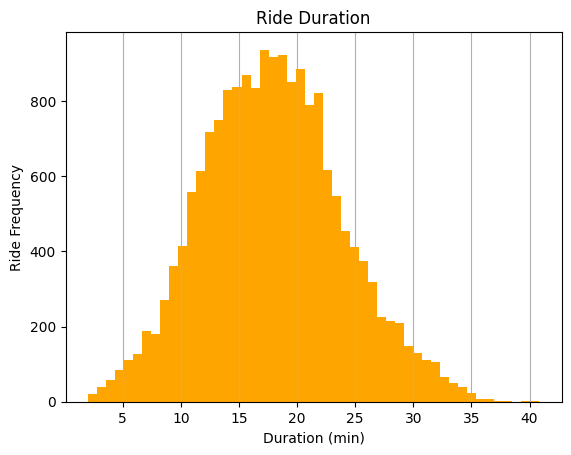

In [26]:
plt.hist(rides['duration'], bins=50, color = 'orange')

plt.xlabel('Duration (min)')
plt.ylabel('Ride Frequency')
plt.title('Ride Duration')
plt.grid(axis='x')
plt.show()

The average user spends between 17 and 19 minutes per ride. 

#### Merging data

##### Merge three datasets in one 

Before merging the tables, we check the number of rows in them 

In [27]:
print('Number of rows in rides:',len(rides))
print('Number of rows in users:',len(users))
print('Number of rows in subscr:', len(subscr))

Number of rows in rides: 18068
Number of rows in users: 1534
Number of rows in subscr: 2


In [28]:
# merge ride and users 
ride_users_df = rides.merge(users, on='user_id', how='left')
#merge ride_users_df with subscr 
total_df = ride_users_df.merge(subscr,on = 'subscription_type', how='left')
#check results 
display(total_df.head())

,user_id,distance,duration,date,month,year,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,2021,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2021,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,2021,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2021,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,2021,Кира,22,Тюмень,ultra,6,0,199


In [29]:
print('Number of rows after merging in total_df:',len(total_df))

Number of rows after merging in total_df: 18068


The number of rows is equal to the number of rides, because there was a left join applied for rides dataset

In [30]:
display(total_df.isnull().sum()) 

user_id              0
distance             0
duration             0
date                 0
month                0
year                 0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

No missing values identified

##### Create two data sets with user data with and w/o subscription

In [31]:
free_df = total_df[total_df['subscription_type'] == 'free']
ultra_df = total_df[total_df['subscription_type'] == 'ultra']

##### Create visualization for duration and distance for users in both categories 

In [32]:
print(len(ultra_df['duration']))
print(len(free_df['duration']))

6500
11568


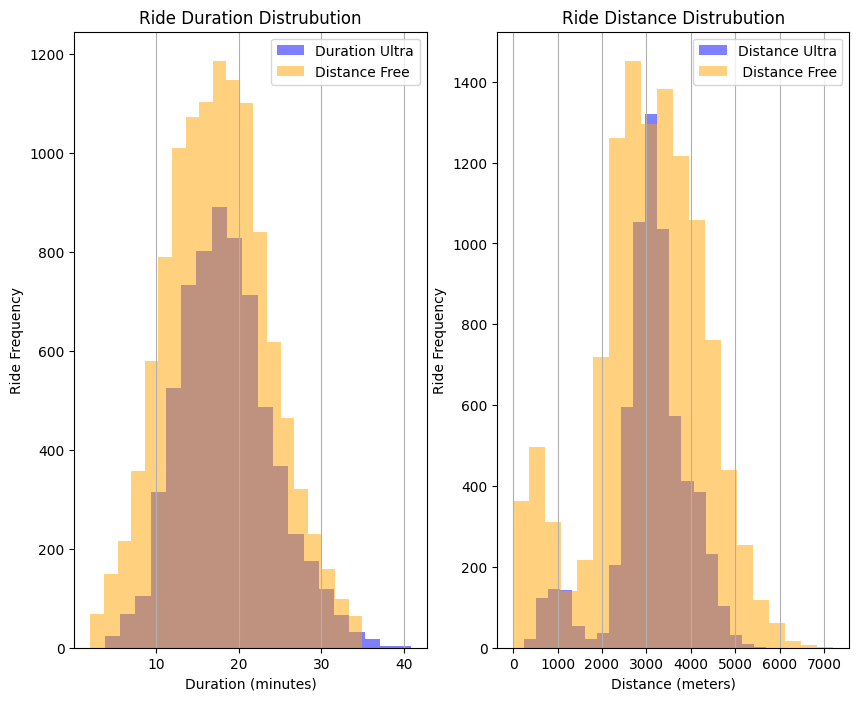

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].hist(ultra_df['duration'], bins=20, alpha=0.5, label='Duration Ultra', color='blue')
axes[0].hist(free_df['duration'], bins=20, alpha=0.5, label='Distance Free', color='orange')

axes[0].set_title('Ride Duration Distrubution')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Ride Frequency')
axes[0].legend(loc='upper right')
axes[0].grid(axis='x')

axes[1].hist(ultra_df['distance'], bins=20, alpha=0.5, label='Distance Ultra', color='blue')
axes[1].hist(free_df['distance'], bins=20, alpha=0.5, label=' Distance Free', color='orange')

axes[1].set_title('Ride Distance Distrubution')
axes[1].set_xlabel('Distance (meters)')
axes[1].set_ylabel('Ride Frequency')
axes[1].legend(loc='upper right')
axes[1].grid(axis='x')

plt.show()

The two graphs of duration and distance of rides show that in general users with and without subscription travel approximately the same distance in total, the same can be said about time. The difference can be seen in the volume of data, as we have more frequent use of the service by non-subscribed users 




#### Calculate Revenue

##### Create data set with aggregated data about the rides based on data set created in Step 4. Find total distance, number of rides, and total time for each user per month

Round the distance and duration in total_df

In [34]:
total_df['duration'] = np.ceil(total_df['duration']) 
total_df['distance'] = np.ceil(total_df['distance']) 

Create an aggregated table, rename the columns 

In [35]:
total_agg = total_df.pivot_table(
    index = ['user_id', 'month', 'subscription_type', 'start_ride_price', 'minute_price', 'subscription_fee' ],
    values = ['distance',  'duration', 'date'], 
    aggfunc={'distance': 'sum',
        'duration': 'sum',
        'date': 'count'}
    
    )

total_agg = total_agg.rename(columns={
    'date': 'total_rides',
    'duration': 'total_duration',
    'distance': 'total distance'
})


total_agg = total_agg.reset_index()

display(total_agg.head() )

,user_id,month,subscription_type,start_ride_price,minute_price,subscription_fee,total_rides,total distance,total_duration
0,1,1,ultra,0,6,199,2,7028.0,42.0
1,1,4,ultra,0,6,199,1,755.0,7.0
2,1,8,ultra,0,6,199,2,6724.0,46.0
3,1,10,ultra,0,6,199,2,5811.0,32.0
4,1,11,ultra,0,6,199,3,7005.0,56.0


#####  Add a new column in this dataset with the monlthly revenue per user 

In [36]:
total_agg['total_revenue'] = (total_agg['start_ride_price'] * total_agg['total_rides']) +  (total_agg['minute_price'] * total_agg['total_duration']) + total_agg['subscription_fee']
display(total_agg.head() )

,user_id,month,subscription_type,start_ride_price,minute_price,subscription_fee,total_rides,total distance,total_duration,total_revenue
0,1,1,ultra,0,6,199,2,7028.0,42.0,451.0
1,1,4,ultra,0,6,199,1,755.0,7.0,241.0
2,1,8,ultra,0,6,199,2,6724.0,46.0,475.0
3,1,10,ultra,0,6,199,2,5811.0,32.0,391.0
4,1,11,ultra,0,6,199,3,7005.0,56.0,535.0


subscription_type
free     2250064.0
ultra    1644537.0
Name: total_revenue, dtype: float64

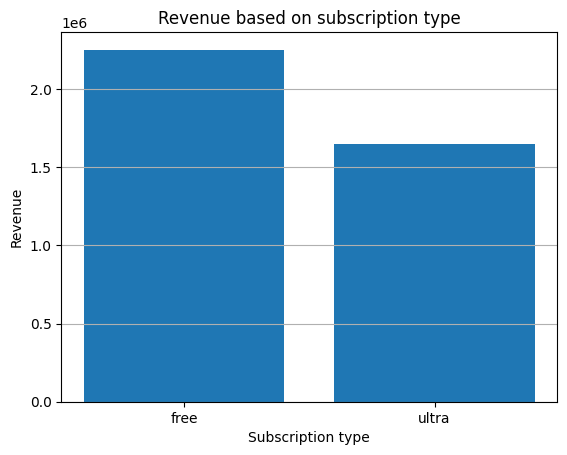

In [38]:
revenue_analysis = total_agg.groupby('subscription_type')['total_revenue'].sum()
display(revenue_analysis)
plt.bar(revenue_analysis.index, revenue_analysis.values)

plt.xlabel('Subscription type')
plt.ylabel('Revenue')
plt.title('Revenue based on subscription type')
plt.grid(axis='y') 

plt.show()




Here we have analyzed revenue depending on subscription type. We can observe that users without subscription bring more revenue than those who are using subscription. 

####  Hypothesis Testing 

The product managers of the service want to increase the number of subscribed users. To achieve this, they will conduct various promotions, but first, they need to determine a few important points.

#####  It is important to understand whether subscribed users spend more time on rides. If so, subscribed users might be more "profitable" for the company. Test this hypothesis.

How to choose a test? There are two samples (with-subscription and without) that are independent of each other, so the test will be conducted by t-test for independent samples (scipy.stats.ttest.ind)

H0 - Users with subscription spend the same amount of time or less time traveling than  users without subscription

H1 - (Right-sided hypothesis) Users with subscription spend more time traveling than users without subscription.

In [39]:
# significance level 
alpha = 0.05

results = st.ttest_ind(ultra_df['duration'], free_df['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# check p-value
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
        print('There is no reason to reject the null hypothesis')



p-value: 1.6681842806080727e-26
Rejecting the null hypothesis


It turns out that users with subscription spend more time on a trip than non-subscribed users. It can be concluded that subscribed users are more profitable for the company than non-subscribed users. 

#####  The distance of one trip is 3130 meters. 3130 meters is optimal in terms of scooter wear and tear. Can it be said that the average distance traveled by subscribed users per trip does not exceed 3130 meters?

How to choose a test? 
There is a single data sample (with subscription), so the test will be conducted t-test about the equality of the mean of the general population to a certain number (scipy.stats.ttest.1samp)

H0 - Average distance traveled by the user with a subscription is equal to or less than 3130 meters 

H1 - (Right-sided hypothesis) Average distance traveled by the user with a subscription is greater than 3130 meters

In [40]:
ride_distance = 3110

# significance level 
alpha = 0.05

results = st.ttest_1samp(
    ultra_df['distance'], 
    ride_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Rejecting the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis') 

p-значение: 0.29994543469720036
There is no reason to reject the null hypothesis


It turns out that the average distance traveled by a user with a subscription is equal to or less than 3130 meters. 

##### Test the hypothesis that the monthly revenue from subscribed users will be higher than the revenue from non-subscribed users. 

How to choose a test? 
There are two samples (with-subscription and non-subscription) that are independent of each other, so the test will be conducted by t-test for independent samples (scipy.stats.ttest.ind)

H0 - Monthly revenue from users with subscription is the same or less than that from users without subscription

H1 - (Right-sided hypothesis) Monthly revenue from subscription users is greater than monthly revenue from non-subscription users.

In [41]:
#prepare two datasets with ultra and free subscription tyes from aggragated table having total_revenue column 

ultra_revenue = total_agg.query('subscription_type =="ultra"')
free_revenue = total_agg.query('subscription_type =="free"')



In [42]:
#do the hypothesis test 

# significance level 
alpha = 0.05

results = st.ttest_ind(ultra_revenue['total_revenue'], free_revenue['total_revenue'], alternative='greater')

print(f'p-value: {results.pvalue}')

# check p-value
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
        print('There is no reason to reject the null hypothesis')



p-value: 1.965468890419924e-27
Rejecting the null hypothesis


We conclude that the monthly revenue from users with a subscription is greater than the monthly revenue from users without a subscription. This is another indicator in favor of using subscriptions. 

##### Imagine this situation: the service's technical team has updated the servers that the mobile application interacts with. They hope that, as a result, the number of support requests has significantly decreased. A certain file contains data for each user on the number of requests before and after the update. What test would you need to check this hypothesis?


A two-sample t-test for dependent samples will work here. Since we have one GS (file with references), in which there were changes (number of references).Method from scipy library: scipy.stats.ttest_rel()

####  Distributions

##### GoFast's marketing department has been given a task: they need to run a promotion giving away promo codes for one free month's subscription

GoFast's marketing department was given a task: they needed to run a promotion with promo codes for one free month of subscription, within which at least 100 existing customers had to renew the subscription. That is, at the end of the subscription period, the user can either cancel the subscription or renew it by making the appropriate payment. This promotion has been run before and it was found that 10% of users renew their subscription after the free trial period. Find out what is the minimum number of promo codes to send out so that the probability of failing to fulfill the plan is about 5%. Find the parameters of the distribution that describes this situation, plot the distribution, and formulate an answer to the question about the number of promo codes.

In [43]:
p = 0.1
goal = 100 
p_fail = 0.05
n = goal 
while True: 
    probability = binom.cdf(goal,n,p)
    if probability <= p_fail:
        break
    n+=1
print('The number of promcodes that need to be sent to have a 5% chance of failing the plan:',n)

The number of promcodes that need to be sent to have a 5% chance of failing the plan: 1172


##### The marketing department sends push notifications to customers in a mobile app. Customers may or may not open it. Using approximation, construct an approximate distribution graph and estimate the probability that no more than 399.5 thousand users will open the notification.


The marketing department sends push notifications to customers in a mobile app. Customers can open it or not. It is known that the notifications are opened by about 40% of the customers who receive them. The department plans to send out 1 million notifications. Using approximation, construct an approximate distribution graph and estimate the probability that no more than 399.5 thousand users will open the notification.

The probability that no more than 399,500 users will open the notification is about 0.05%.

In [45]:
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))


# normal distribution 
distr = st.norm(mu, sigma)
# calculate probability
result = distr.cdf(399500)
result

0.15371708296369768

#### Conclusion




In this research, we have analyzed the data from the GoFast scooter rental service. The data was prepared for analysis by converting data types, checking for missing values, cleaning duplicates, and introducing additional columns for further analysis.

***Key Findings from Chapter Three:***

1. **Cities with Highest Scooter Usage**:
   - The most frequent scooter usage was observed in Ekaterinburg and Pyatigorsk.

2. **User Subscription Analysis**:
   - The total number of users without a subscription exceeds those with a subscription by approximately 10%.

3. **User Demographics**:
   - The average age of users is 25 years.

4. **Riding Distance**:
   - The typical distances ridden by users are around 700 meters and 3100 meters, indicating both short and long-distance rides.

5. **Ride Duration**:
   - The average duration of a ride is approximately 17-19 minutes.

***Further Analysis:***

We merged the datasets to analyze the following parameters for different types of user subscriptions: duration, distance, and revenue.

 ***Conclusions:***
- **Ride Duration and Distance**:
  - Users with an ultra subscription tend to ride less in terms of both distance and duration compared to users without a subscription.

- **Revenue Analysis**:
  - Although users without a subscription generated more total revenue, this is primarily due to the larger number of non-subscribed users in the dataset.

***Hypothesis Testing:***

To draw definitive conclusions, we tested several hypotheses and derived the following results:
- Despite having more non-subscribed users, the t-test showed that users with subscriptions spend more time riding scooters.
- Users with subscriptions contribute more revenue per user to the company.

***Recommendations:***

Based on these findings, we recommend that the company invest more in promoting the subscription option, as it has the potential to bring in more future profit.

***Methodological Recommendations:***

To avoid data misinterpretation, we suggest using t-tests rather than solely relying on graphical analysis for decision-making, as total numbers can be misleading.

